# PREDICTING CAR PRICES

In this project I will be practising the K Nearest Neighbours machine learning algorithm.

I will be predicting car prices based on certian attributes of cars. The datset I will be using is the Automobile Data Set from the UCI Machine Learning Repository.

## INTRODUCTION TO THE DATASET

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cars = pd.read_csv('imports-85.data')
print(cars.head)

<bound method NDFrame.head of      3    ?  alfa-romero     gas    std   two  convertible  rwd  front  88.60  \
0    3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6   
1    1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   94.5   
2    2  164         audi     gas    std  four        sedan  fwd  front   99.8   
3    2  164         audi     gas    std  four        sedan  4wd  front   99.4   
4    2    ?         audi     gas    std   two        sedan  fwd  front   99.8   
..  ..  ...          ...     ...    ...   ...          ...  ...    ...    ...   
199 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
200 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   
201 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
202 -1   95        volvo  diesel  turbo  four        sedan  rwd  front  109.1   
203 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1  

In [64]:
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

The column names look incorrect. Going to the UCI repository we find the correct column names and rename all the columns in the dataset.

In [65]:
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

print(len(column_names))

26


In [66]:
cars.columns = column_names.copy()
print(cars.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   
3        sedan          4wd           front        99.4  ...          136   
4        sedan          fwd           front        99.8  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [67]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    204 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         204 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression-ratio    204 non-null float64
horsepower           204 non-nul

## DATA CLEANING

Looking at the dataset information we have a list of all the columns and they are labeled as continuous variables.
These columns will be separated from the dataset and will be used to calculate a similairty metric for predicting car prices.

A we are trying to predict the price of cars, the price column will be the target column. Only the numeric features can bse used in our KNN model.

In [68]:
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                  'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_data = cars.loc[:, continuous_cols]

In [69]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
normalized-losses    204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-size          204 non-null int64
bore                 204 non-null object
stroke               204 non-null object
compression-ratio    204 non-null float64
horsepower           204 non-null object
peak-rpm             204 non-null object
city-mpg             204 non-null int64
highway-mpg          204 non-null int64
price                204 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.0+ KB


In [70]:
numeric_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


Looking at the first five rows of the dataset we can see that some columns have numerical values but have been cast as string objects as there is a ? for missing values. To fix this all the ? will be replaced with the numpy.nan value and these columns will be case as an int or float data type. 

In [71]:
numeric_data = numeric_data.replace(to_replace = "?", value=np.nan)
numeric_data = numeric_data.astype(float)
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null float64
engine-size          204 non-null float64
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    204 non-null float64
horsepower           202 non-null float64
peak-rpm             202 non-null float64
city-mpg             204 non-null float64
highway-mpg          204 non-null float64
price                200 non-null float64
dtypes: float64(15)
memory usage: 24.0 KB


In [72]:
non_numeric_cols = []
for col in cars.columns:
    if col not in numeric_data.columns:
        non_numeric_cols.append(col)
        
cars.loc[:, non_numeric_cols].head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,2,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi


Looking at the columns that are not in the numeric_data dataframe we could use the num-of-doors and num-of-cylinders columns as well. These columns contain numeric values that are represented as strings. Below we take a look at all the unique values from both columns to confrim this.

In [73]:
cars.loc[:, "num-of-doors"].unique()

array(['two', 'four', '?'], dtype=object)

In [74]:
cars.loc[:, "num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

The values in both columns can be considered quantitative variables on a ratio scale, and can be used as features in our K Nearest Neighbours machine learning model.

The following statements are true for both columns:
* We can tell that two individual values are different.
* We can tell the direction of the difference between values.
* We can tell the size of the difference between values.

Below we convert each unique string in the num-of-doors and num-of-cylinder columns to their numeric values.

In [75]:
num_of_doors = cars.loc[:, "num-of-doors"].replace("two", 2)
num_of_doors = num_of_doors.replace("four", 4)
num_of_doors = num_of_doors.replace('?', np.nan)
numeric_data.loc[:, "num-of-doors"] = num_of_doors

In [76]:
num_of_cy = cars.loc[:, "num-of-cylinders"]
unique_cy = l=cars.loc[:, "num-of-cylinders"].unique()
values = [4, 6, 5, 3, 12, 2, 8]
for index, num in np.ndenumerate(unique_cy):
    num_of_cy = num_of_cy.replace(num, values[index[0]])
    
numeric_data.loc[:, "num-of-cylinders"] = num_of_cy

In [77]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 17 columns):
normalized-losses    164 non-null float64
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null float64
engine-size          204 non-null float64
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    204 non-null float64
horsepower           202 non-null float64
peak-rpm             202 non-null float64
city-mpg             204 non-null float64
highway-mpg          204 non-null float64
price                200 non-null float64
num-of-doors         202 non-null float64
num-of-cylinders     204 non-null int64
dtypes: float64(16), int64(1)
memory usage: 27.2 KB


In [78]:
numeric_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,num-of-doors,num-of-cylinders
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,2.0,4
1,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,2.0,6
2,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,4.0,4
3,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,4.0,5
4,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0,2.0,5


In [79]:
numeric_data.shape

(204, 17)

Now that we have all the potential numeric columns that can be used in our model, we will find the number of missing values in the dataframe and decide how to proceed.

In [80]:
numeric_data.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
num-of-doors          2
num-of-cylinders      0
dtype: int64

As the price column is the target column, any rows with missing values in the price column will be dropped.

In [81]:
numeric_data = numeric_data.dropna(axis=0, subset=['price'])
numeric_data.isnull().sum()

normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
num-of-doors          2
num-of-cylinders      0
dtype: int64

The normalized-losses column has the most missing values, 36, to be exact. Below we calculate this as a percentage of the whole dataset.

In [82]:
(36/numeric_data.shape[0]) * 100

18.0

This is roughly 18% of the whole dataset which is a very large amount. If the rows with missing data are dropped we lose a lot of observations which will make out model less accurate. The two options we have are to either impute values or just drop the normalized-losses column.

As normalized-losses is a continuous numeric variable we could either use the median or the mean for the missing values in the column.

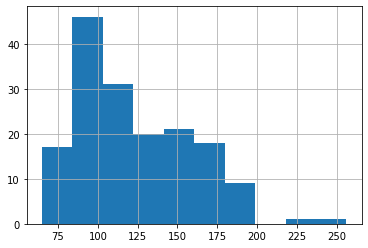

In [83]:
numeric_data["normalized-losses"].hist()

The histogram for the normalized-losses column shows that the data is skewed. If we look at the summary statistics of the column we can compare the median of the column with the mean.

In [84]:
numeric_data.loc[:, "normalized-losses"].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [85]:
numeric_data.loc[:, "normalized-losses"].median()

115.0

As the values are skewed and there are outliers, the median is a better value to use to impute the missing values in the column than the mean.

In [86]:
numeric_data.loc[:, "normalized-losses"].fillna(numeric_data.loc[:, "normalized-losses"].median(), inplace = True)

The rest of the missing values will be filled with the mean values of the respective columns.

In [87]:
numeric_data = numeric_data.fillna(numeric_data.mean())

Below we check that there are no more missing values in the dataset and check the dimensions of the dataset.

In [88]:
numeric_data.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
num-of-doors         0
num-of-cylinders     0
dtype: int64

In [89]:
numeric_data.shape

(200, 17)

As all the columns haev different range of values, all the values in the dataset will be normalised so that all the values range from between 0 to 1.

In [90]:
price_col = numeric_data.loc[:, "price"]
numeric_cars = (numeric_data - numeric_data.mean()) / numeric_data.std()
numeric_cars.loc[:, "price"] = price_col

## UNIVARIATE MODEL

The knn_train_test() function takes in three parameters:

* The training column name
* The target column name
* The dataframe object name

The function splits the data into a training and test set. A K nearest neighbours model is created and the root mean squared error for the model is returned.

In [91]:
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(features, target, data):
    
    # see the permutation method, so that every time the dataset is shuffled the same order is returned
    np.random.seed(1)
    
    # shuffle all the rows in the dataset
    shuffled_index = np.random.permutation(data.index)
    # reindex the dataset
    data = data.reindex(shuffled_index)
    
    # split the dataset
    no_rows = data.shape[0]
    split = math.ceil(0.5 * no_rows)
    train = data.iloc[0:split]
    test = data.iloc[split:]
    
    # train the model on the train dataset and features
    knn = KNeighborsRegressor(algorithm = 'brute')
    train_columns = train.loc[:, [features]]
    train_target = train.loc[:, target]
    knn.fit(train_columns, train_target)
    
    # use the model trained on the train dataset to make predictions on the observations from the test dataset
    predictions = knn.predict(test.loc[:, [features]])
    
    # calculate the error of the predictions using root mean squared error (rmse)
    mse = mean_squared_error(test.loc[:, target], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

Below 16 univariate models have been created using only one feature. We have sorted the features with respect to the size of the root mean squared error.

In [92]:
features = numeric_cars.columns.drop("price")
rmse = {}

for f in features:
    rmse[f] = knn_train_test(f, "price", numeric_cars)

results = pd.Series(rmse)
results_sorted = results.sort_values()
print(results_sorted)

engine-size          3232.018303
curb-weight          3440.606834
width                3825.767222
city-mpg             4037.785897
highway-mpg          4096.863295
horsepower           4366.964036
num-of-cylinders     4858.266960
length               5142.371436
wheel-base           5460.419746
bore                 6300.651994
peak-rpm             6519.478942
compression-ratio    6931.878437
normalized-losses    6940.063496
height               7144.481813
stroke               8159.614035
num-of-doors         9109.788104
dtype: float64


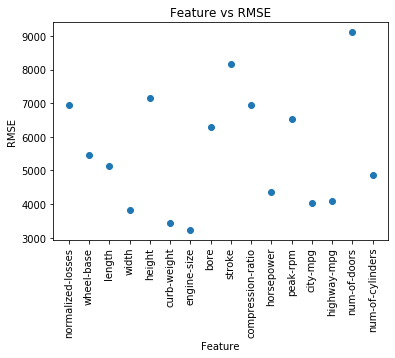

In [93]:
plt.scatter(results.index, results)
plt.xlabel("Feature")
plt.ylabel("RMSE")
plt.title("Feature vs RMSE")
plt.xticks(rotation = 90)
plt.show()

The num-of-doors and peak-rpm features have the largest rmse. The engine-size feature has the smallest rmse. We will now change the number of nearest neighbors (k) used by the model and see how this affects the rmse.

The function will be modified to accept an argument for the number of nearest neighbors.

In [94]:
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(features, target, k_values, data):
    
    np.random.seed(1)
    
    # shuffle all the rows in the dataset
    shuffled_index = np.random.permutation(data.index)
    # reindex the dataset
    data = data.reindex(shuffled_index)
    
    # split the dataset
    no_rows = data.shape[0]
    split = math.ceil(0.5 * no_rows)
    train = data.iloc[0:split]
    test = data.iloc[split:]
    
    rmses = {}
    for k in k_values:
        # train the model on the train dataset and features
        knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
        train_columns = train.loc[:, [features]]
        train_target = train.loc[:, target]
        knn.fit(train_columns, train_target)

        # use the model trained on the train dataset to make predictions on the observations from the test dataset
        predictions = knn.predict(test.loc[:, [features]])

        # calculate the error of the predictions using root mean squared error (rmse)
        mse = mean_squared_error(test.loc[:, target], predictions)
        rmse = np.sqrt(mse)
        
        rmses[k] = rmse
    
    return rmses

In [95]:
rmse = {}
k_values = [i for i in range(1, 10, 2)]

for f in features:
    rmse[f] = knn_train_test(f, "price", k_values, numeric_cars)

rmse

{'normalized-losses': {1: 7050.984517781896,
  3: 6901.497890474373,
  5: 6940.06349581904,
  7: 7188.488593308223,
  9: 7707.740134516378},
 'wheel-base': {1: 5089.635131323266,
  3: 5685.603367473168,
  5: 5460.419746319874,
  7: 5476.433434624906,
  9: 5495.007838849036},
 'length': {1: 6173.578822692717,
  3: 6120.567906747797,
  5: 5142.371436292792,
  7: 4998.775600696879,
  9: 4947.5096427956105},
 'width': {1: 3677.30829004042,
  3: 3684.6171316253017,
  5: 3825.767221512569,
  7: 3478.1628251954257,
  9: 3496.7049840078275},
 'height': {1: 11851.991525477903,
  3: 7470.364951965569,
  5: 7144.481812783905,
  7: 7165.197922683259,
  9: 7275.22973335457},
 'curb-weight': {1: 4479.481252332685,
  3: 3691.709132336644,
  5: 3440.606834150046,
  7: 3174.692208413796,
  9: 3373.9007620406924},
 'engine-size': {1: 3400.9133567322765,
  3: 3060.967213697875,
  5: 3232.018303413519,
  7: 3176.313373123898,
  9: 3215.6639030160622},
 'bore': {1: 6576.867542379123,
  3: 5931.187553002256

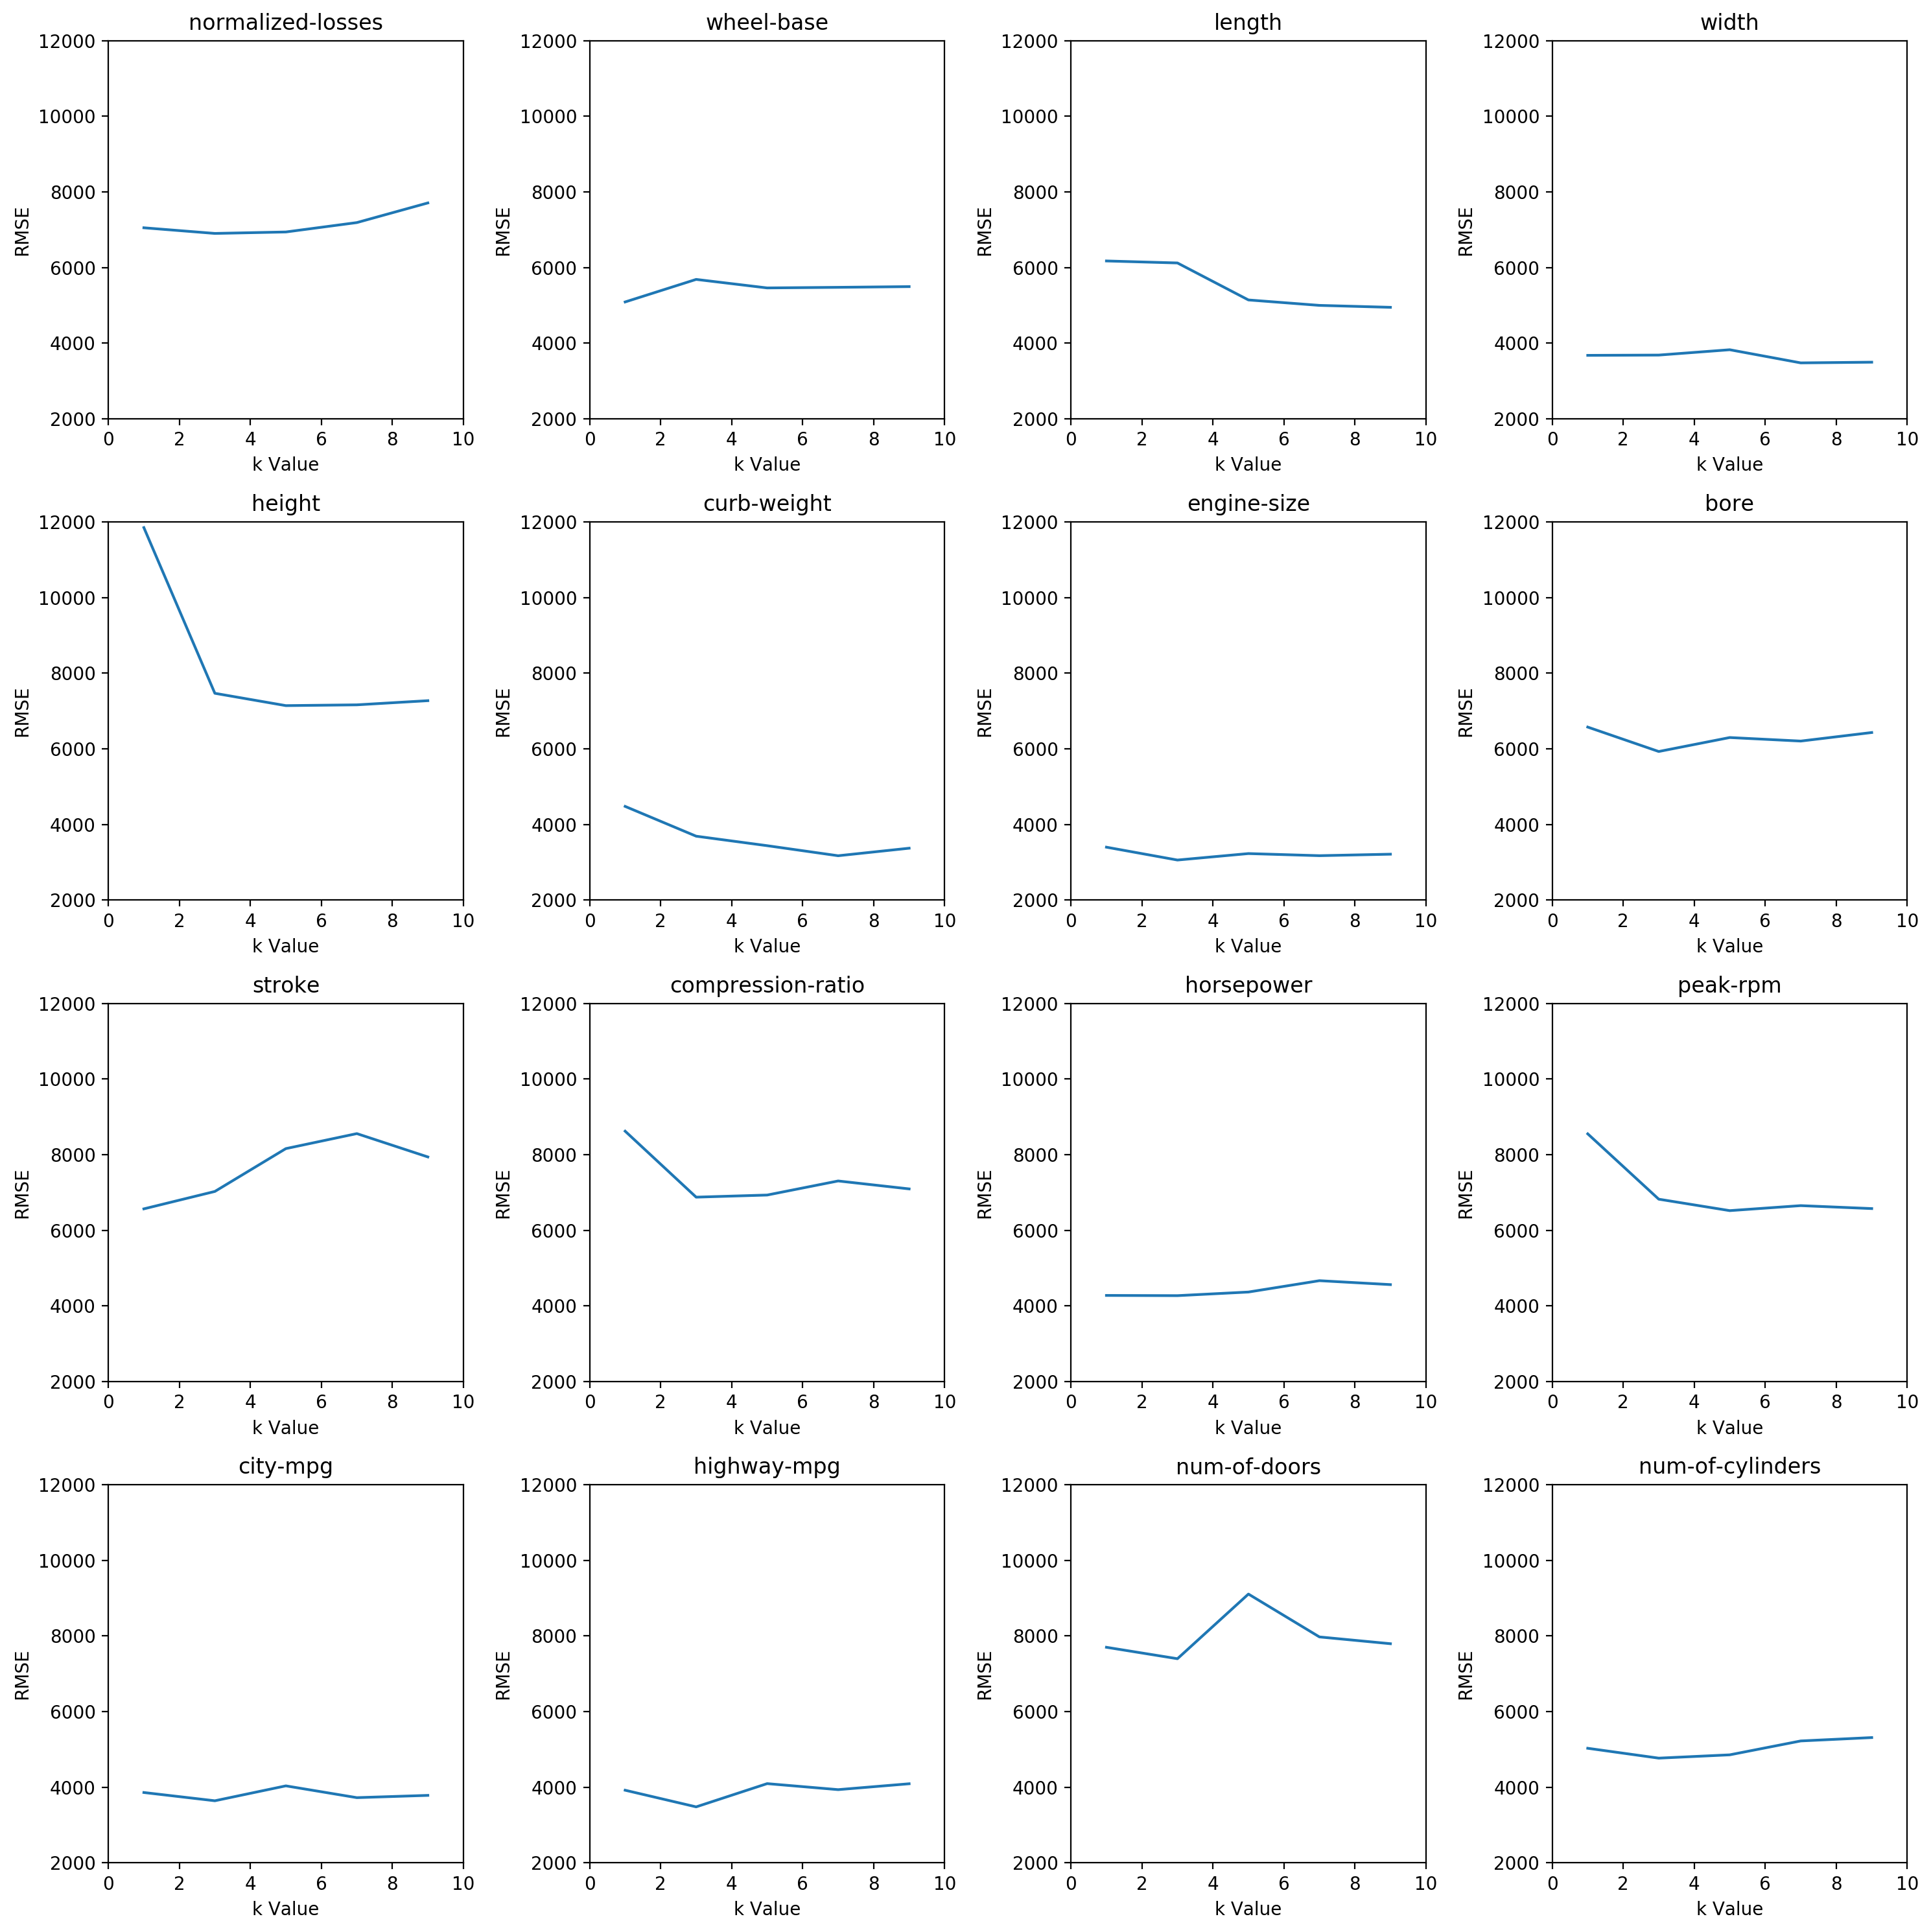

In [96]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15), dpi=200)
keys = list(rmse.keys())
i = 0

for row in axes:
    
    for axis in row:
        
        k_values = list(rmse[keys[i]].keys())
        values = list(rmse[keys[i]].values())
        axis.set_xlim(0, 10)
        axis.set_ylim(2000, 12000)
        axis.plot(k_values, values)
        axis.set_xlabel('k Value')
        axis.set_ylabel('RMSE')
        axis.set_title(keys[i])
        i += 1
    
plt.tight_layout()
plt.show()

In [97]:
print(f"Maximum price for a car: $ {numeric_cars.loc[:, 'price'].max()}")
print(f"Minimum price for a car: $ {numeric_cars.loc[:, 'price'].min()}")

Maximum price for a car: $ 45400.0
Minimum price for a car: $ 5118.0


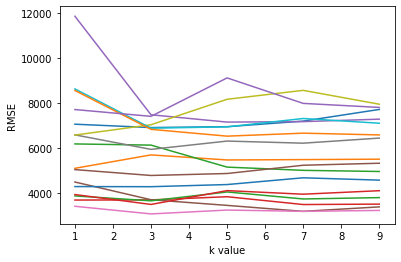

In [115]:
for k, v in rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel("k value")
    plt.ylabel("RMSE")

The prices of the cars in the dataset range from 5118 - 45400 dollars, looking at the graphic above of the root mean squared error for various k values, the errors range from $3000 to 12000. Each model for a feature is very inaccurate and would not be of any use. We tried varying the k value to see if the this made a difference but for most features the rmse stays the same.

# MULTIVARIATE MODEL

Above multiple models were created using just one feature, now models will be created using multiple features. Theoretically using more features should improve the accuracy of model and thus make better predictions.

In [99]:
def knn_train_test(features, target, data):
    
    np.random.seed(1)
    
    # shuffle all the rows in the dataset
    shuffled_index = np.random.permutation(data.index)
    # reindex the dataset
    data = data.reindex(shuffled_index)
    
    # split the dataset
    no_rows = data.shape[0]
    split = math.ceil(0.5 * no_rows)
    train = data.iloc[0:split]
    test = data.iloc[split:]
    
    rmses = {}
    k_values = [5]
    for k in k_values:
        # train the model on the train dataset and features
        knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
        train_columns = train.loc[:, features]
        train_target = train.loc[:, target]
        knn.fit(train_columns, train_target)

        # use the model trained on the train dataset to make predictions on the observations from the test dataset
        predictions = knn.predict(test.loc[:, features])

        # calculate the error of the predictions using root mean squared error (rmse)
        mse = mean_squared_error(test.loc[:, target], predictions)
        rmse = np.sqrt(mse)
        
        rmses[k] = rmse
    
    return rmses

To find the best features, all the rmse values that were calculated for each feature will be averaged.

In [100]:
average_rmse_dict = {}

for key, v in rmse.items():
    average_rmse_dict[key] = np.mean(list(v.values()))

series_avg_rmse = pd.Series(average_rmse_dict)
avg_rmse = series_avg_rmse.sort_values()
print(avg_rmse)
avg_index = list(avg_rmse.index)

engine-size          3217.175230
curb-weight          3632.078038
width                3632.512090
city-mpg             3811.050604
highway-mpg          3906.512402
horsepower           4429.227003
num-of-cylinders     5040.232456
wheel-base           5441.419904
length               5476.560682
bore                 6289.752592
peak-rpm             7023.667892
normalized-losses    7157.754926
compression-ratio    7365.349749
stroke               7649.789323
num-of-doors         7997.024469
height               8181.453189
dtype: float64


The following 7 features have the lowest average rmse and will be used:
* engine-size
* curb-weight
* width
* city-mpg
* highway-mpg
* horsepower
* num-of-cylinders

The default value for k, 5, will be used for these multivariate models.

* The first multivariate model will use the two best features, engine-size and curb-weight.
* The second multivariate model will use the three best features, engine-size, curb-weight and width.
* The third multivariate model will use the four best features, engine-size, curb-weight, width and city-mpg.
* The fouth multivariate model will use the five best features, engine-size, curb-weight, width, city-mpg and highway-mpg.
* The fifth multivariate model will use the six best features, engine-size, curb-weight, width, city-mpg, highway-mpg and horsepower.
* The sixth multivariate model will use the seven best features, engine-size, curb-weight, width, city-mpg, highway-mpg, horsepower, num-of-cylinders.

In [101]:
mv_rmse = {}
for i in range(2, 8):
        mv_rmse[f"{i} best features"] = knn_train_test(avg_index[0:i], "price", numeric_cars)

In [102]:
mv_rmse

{'2 best features': {5: 2810.874841895313},
 '3 best features': {5: 2734.9181650645414},
 '4 best features': {5: 2706.5025118776443},
 '5 best features': {5: 2898.70817848227},
 '6 best features': {5: 2776.3789767248995},
 '7 best features': {5: 2780.7918711043444}}

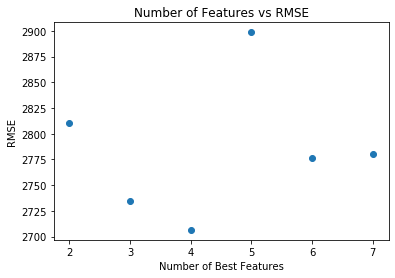

In [103]:
y = []
for key, value in mv_rmse.items():
    y += list(value.values())

x = [2, 3, 4, 5, 6, 7]

plt.scatter(x, y)
plt.xlabel("Number of Best Features")
plt.ylabel("RMSE")
plt.title("Number of Features vs RMSE")
plt.show()

Using the four best features yielded the smallest rmse value. The rmse for 4 features is $2706.50 which is still large but compared to the univaruate models and the other multivariate models is significantly smaller.

## HYPERPARAMETER OPTIMIZATION

Values that affect the behaviour and performance of a model that are unrelated to the data that is used in the model are referred to as hyperparameters. With the KNN model this would be referring to the value k.

With the multivariate models we tried to make better predictions by varying the number of features used in the data. Now we will leave the data and vary the value of k. We want to reduce the error of the model by adjusting the k value.

The hyperparameter optimization that will be used is grid search. Grid search is carried out with the following steps:
* select a subset of possible hyperparameter values
* train a model using each hyperparameter value
* evaluate each model's performance
* select the hyperparameter with the lowest rmse value

The multivariate models will be used. The k value will be varied from 1 to 25 for each of these models and the rmse values will be analysed.

In [104]:
def knn_train_test(features, target, data):
    
    np.random.seed(1)
    
    # shuffle all the rows in the dataset
    shuffled_index = np.random.permutation(data.index)
    # reindex the dataset
    data = data.reindex(shuffled_index)
    
    # split the dataset
    no_rows = data.shape[0]
    split = math.ceil(0.5 * no_rows)
    train = data.iloc[0:split]
    test = data.iloc[split:]
    
    rmses = {}
    k_values = [i for i in range(1, 26)]
    for k in k_values:
        # train the model on the train dataset and features
        knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
        train_columns = train.loc[:, features]
        train_target = train.loc[:, target]
        knn.fit(train_columns, train_target)

        # use the model trained on the train dataset to make predictions on the observations from the test dataset
        predictions = knn.predict(test.loc[:, features])

        # calculate the error of the predictions using root mean squared error (rmse)
        mse = mean_squared_error(test.loc[:, target], predictions)
        rmse = np.sqrt(mse)
        
        rmses[k] = rmse
    
    return rmses

In [107]:
hp_rmse = {}
for i in range(2, 8):
        hp_rmse[f"{i} best features"] = knn_train_test(avg_index[0:i], "price", numeric_cars)

In [108]:
hp_rmse

{'2 best features': {1: 3397.895426583932,
  2: 2820.9806012271692,
  3: 2809.9668582466315,
  4: 2748.766999492682,
  5: 2810.874841895313,
  6: 2894.1032970795404,
  7: 3002.814788575845,
  8: 3187.5012181860416,
  9: 3319.9058931887857,
  10: 3327.5017925464745,
  11: 3454.5682083939646,
  12: 3579.1354610785547,
  13: 3593.2410514528738,
  14: 3648.926508864194,
  15: 3660.0405712141132,
  16: 3660.17405267282,
  17: 3692.85363613145,
  18: 3637.8536480116754,
  19: 3621.402742613769,
  20: 3645.2235176083514,
  21: 3707.5068442925617,
  22: 3737.254427414231,
  23: 3750.8844630766375,
  24: 3781.9865051043835,
  25: 3838.04087115497},
 '3 best features': {1: 2569.0079544446726,
  2: 2563.877284017314,
  3: 2795.293507944301,
  4: 2780.866415795624,
  5: 2734.9181650645414,
  6: 2689.198073724251,
  7: 2643.8165598317933,
  8: 2840.7956048878277,
  9: 2933.791793697268,
  10: 3013.6049534734975,
  11: 3119.465514361275,
  12: 3254.451575790715,
  13: 3338.286401512115,
  14: 3462.7

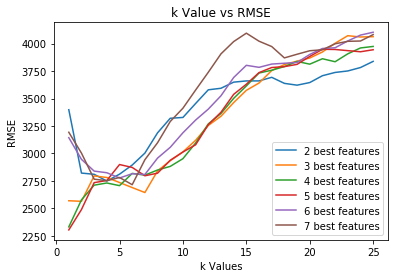

In [123]:
for k, v in hp_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label="{}".format(k))

plt.title("k Value vs RMSE")
plt.xlabel("k Values")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The optimal k values lie between 0 - 5. The as the number of neighbours increase the rmse increases.